# ANAC


#### imports

In [3433]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

#### set seed

In [3434]:
seed = 2024
np.random.seed(seed)

#### read in data

In [3435]:
diet_csv = pd.read_csv("diet.csv").copy()
recipes_csv = pd.read_csv("recipes.csv").copy()
requests_csv = pd.read_csv("requests.csv").copy()
reviews_csv = pd.read_csv("reviews.csv").copy()

/var/folders/z0/24mzs0z565s6qpzztgbdrj780000gn/T/ipykernel_29652/3884275055.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_csv = pd.read_csv("reviews.csv").copy()


In [3436]:
diet_csv.info() # 271907 entries
requests_csv.info() # 140195 entries
recipes_csv.info() #75604 entries
reviews_csv.info() # 140195 entries
# --> not all customers gave a review!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  object 
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  object 
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 8.6+ MB
<class 'pandas.core.frame.DataFra

### Data Cleaning
#### diet_csv

In [3437]:
#rename column
diet_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Change type of Diet into category
diet_csv["Diet"] = diet_csv["Diet"].astype("category")
diet_csv.dropna(subset=["Diet"], inplace=True)

#### recipes_csv

In [3438]:
# Change type for Recipe Category
recipes_csv["RecipeCategory"] = recipes_csv["RecipeCategory"].astype("category")


In [3439]:
# Add new column TotalTimeNeeded
recipes_csv["TotalTimeNeeded"] = recipes_csv["CookTime"] + recipes_csv["PrepTime"]

#drop recipeservings and yields and saturated + cholesterol + sodium + carbohydratecontent 
recipes_csv = recipes_csv.drop("RecipeServings", axis=1)
recipes_csv = recipes_csv.drop("RecipeYield", axis=1)
#recipes_csv = recipes_csv.drop("SaturatedFatContent", axis=1)
#recipes_csv = recipes_csv.drop("CholesterolContent", axis=1)
#recipes_csv = recipes_csv.drop("SodiumContent", axis=1)
#recipes_csv = recipes_csv.drop("CarbohydrateContent", axis=1)
#also drop cook n preptime n quantities n parts
#recipes_csv = recipes_csv.drop("PrepTime", axis=1)
#recipes_csv = recipes_csv.drop("CookTime", axis=1)
recipes_csv = recipes_csv.drop("RecipeIngredientQuantities", axis=1)
recipes_csv = recipes_csv.drop("RecipeIngredientParts", axis=1)

In [3440]:
requests_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  float64
 4   HighProtein   140195 non-null  object 
 5   LowFat        140195 non-null  int64  
 6   LowSugar      140195 non-null  object 
 7   HighFiber     140195 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 8.6+ MB


##### requests_csv

In [3441]:
#rename column
requests_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Map indifferent values for HighProtein and LowSugar
#requests_csv["HighProtein"] = requests_csv["HighProtein"].map({
#    "Indifferent": 0,
#    "0": 0,
#    "1": 1,
#    "Yes": 1
#})

mapping_cal = {1: 1, 0.0: 0}
requests_csv['HighCalories'] = requests_csv['HighCalories'].map(mapping_cal).astype('category')

mapping_protein = {'Yes':1, 'Indifferent': 0,'No': 0,}
requests_csv['HighProtein'] = requests_csv['HighProtein'].map(mapping_protein).astype('category')

requests_csv['LowFat'] = requests_csv['LowFat'].astype('category')

mapping_sugar = {'1':1,'Indifferent': 0,'0': 0, }
requests_csv['LowSugar'] = requests_csv['LowSugar'].map(mapping_sugar).astype('category')

requests_csv['HighFiber'] = requests_csv['HighFiber'].astype('category')


In [3442]:
requests_csv

,CustomerId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.950949,0,0,0,0,0
1,437641B,365718,4201.820980,0,1,0,0,1
2,1803340263D,141757,6299.861496,0,0,1,0,0
3,854048B,280351,19801.365796,0,1,1,0,1
4,2277685E,180505,5400.093457,0,0,0,0,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1560.649725,0,0,0,0,1
140191,33888B,333262,1502.011466,1,0,1,0,0
140192,401942C,49200,5999.274269,0,0,0,0,1
140193,346866B,214815,899.523513,0,1,1,0,1


In [3443]:
#TODO: how to handle negative time values? -> here: take the total time value from recipes by recipeId!
request_with_recipe = pd.merge(requests_csv, recipes_csv, on="RecipeId", how="left")
#request_with_recipe['Time'] = np.where(request_with_recipe['Time'] < 0, request_with_recipe['TotalTimeNeeded'], request_with_recipe['Time'])
request_with_recipe['Time'] = np.where(request_with_recipe['Time'] < 0, 0, request_with_recipe['Time'])
request_with_recipe['Time'] = request_with_recipe['Time'].round().astype('int')
request_with_recipe.rename(columns={'Time':'MaxTime'}, inplace=True)
requests_csv = request_with_recipe[['CustomerId', 'RecipeId', 'MaxTime', 'HighCalories','HighProtein', 'LowFat', 'LowSugar', 'HighFiber']]
#request_with_recipe = request_with_recipe[['CustomerId','RecipeId', 'Time','TotalTimeNeeded']]

In [3444]:
requests_csv

,CustomerId,RecipeId,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1800,0,0,0,0,0
1,437641B,365718,4202,0,1,0,0,1
2,1803340263D,141757,6300,0,0,1,0,0
3,854048B,280351,19801,0,1,1,0,1
4,2277685E,180505,5400,0,0,0,0,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1561,0,0,0,0,1
140191,33888B,333262,1502,1,0,1,0,0
140192,401942C,49200,5999,0,0,0,0,1
140193,346866B,214815,900,0,1,1,0,1


#### reviews_csv

In [3445]:
#rename column
reviews_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
# Remove NA rows and Rating column and TestSetId
reviews_csv = reviews_csv.drop("Rating", axis=1)
reviews_csv.dropna(subset=["Like"], inplace=True) # note: now the entries are reduced to 97381 entries
reviews_csv = reviews_csv.drop("TestSetId", axis=1)

In [3446]:
# convert Like type to boolean
reviews_csv["Like"] = reviews_csv["Like"].astype("int")

In [3447]:
#merge diet + review
review_with_diet = pd.merge(reviews_csv, diet_csv, on="CustomerId", how="inner") # 97381 entries
#merge diet + review + request
review_diet_with_request = pd.merge(review_with_diet, requests_csv, on=["CustomerId", "RecipeId"], how="inner") # 97381 entries


In [3448]:
# merge 'review_with_diet' with 'recipes_csv'
df = pd.merge(review_diet_with_request, recipes_csv, on='RecipeId', how='left')
df['TimeDeviation'] = df['MaxTime'] - df['TotalTimeNeeded']
#df.drop(['TotalTimeNeeded', 'MaxTime'], axis=1, inplace=True)

In [3449]:
df = pd.get_dummies(df, columns=['Diet', 'RecipeCategory'], drop_first=True) 
df

,CustomerId,RecipeId,Like,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,...,TotalTimeNeeded,TimeDeviation,Diet_Vegan,Diet_Vegetarian,RecipeCategory_Bread,RecipeCategory_Breakfast,RecipeCategory_Lunch,RecipeCategory_One dish meal,RecipeCategory_Other,RecipeCategory_Soup
0,1000036C,320576,0,50,119,0,0,0,0,1,...,120,-1,False,True,False,False,False,False,False,False
1,1000216B,189335,0,78,1199,0,1,0,0,1,...,1200,-1,False,True,False,False,False,False,True,False
2,1000221A,133043,0,25,362,0,1,0,0,1,...,360,2,False,True,False,False,False,False,True,False
3,1000221A,90537,0,25,1199,0,1,0,0,1,...,1200,-1,False,True,False,True,False,False,False,False
4,1000221A,334314,0,25,5400,1,0,0,0,0,...,5400,0,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,0,31,3899,0,0,1,0,0,...,3900,-1,False,True,False,False,False,False,True,False
97377,999774A,29002,0,57,2402,0,0,0,0,0,...,2400,2,False,True,False,False,False,False,True,False
97378,999774A,159252,0,57,6000,0,1,0,0,0,...,6000,0,False,True,False,False,False,False,True,False
97379,999774A,1171,1,57,480,1,1,0,0,0,...,480,0,False,True,False,False,False,False,False,False


In [3450]:
df = df[df["Calories"] < 300000]
 

In [3451]:
#df = df[(df['Calories'] <= 30000) | (df['Like'] != 1)]

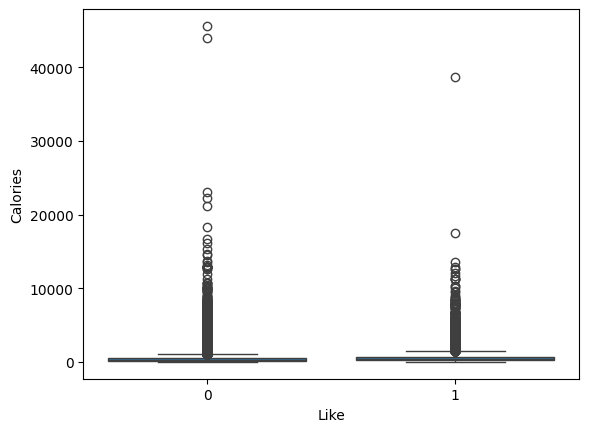

In [3452]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'
sns.boxplot(x='Like', y='Calories', data=df)
# or use violinplot for a more detailed view
# sns.violinplot(x='Binary1', y='Numeric', hue='Binary2', data=df)
plt.show()


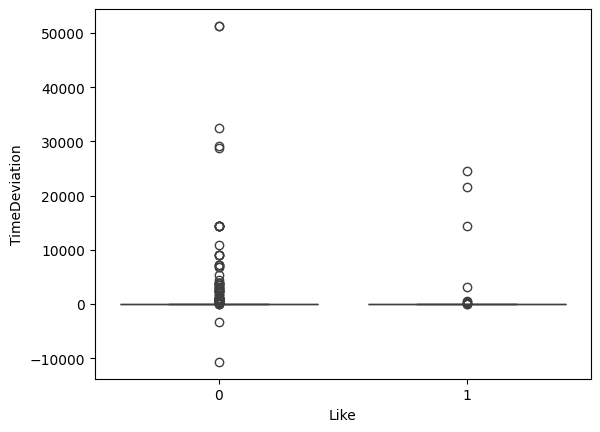

In [3453]:
sns.boxplot(x='Like', y='TimeDeviation', data=df)
# or use violinplot for a more detailed view
# sns.violinplot(x='Binary1', y='Numeric', hue='Binary2', data=df)
plt.show()

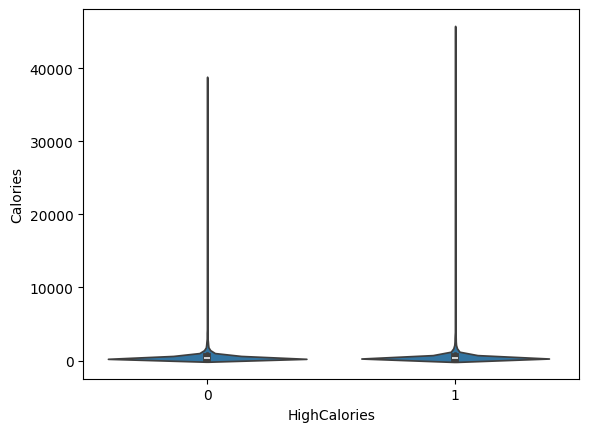

In [3454]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'
sns.violinplot(x='HighCalories', y='Calories', data=df)
plt.show()

In [3455]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=["Like", "CustomerId", "RecipeId", "TotalTimeNeeded", "Diet_Vegan", "RecipeCategory_Other", "Name"]).copy()
y = df['Like']

In [3456]:
X

,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,CookTime,PrepTime,Calories,...,FiberContent,SugarContent,ProteinContent,TimeDeviation,Diet_Vegetarian,RecipeCategory_Bread,RecipeCategory_Breakfast,RecipeCategory_Lunch,RecipeCategory_One dish meal,RecipeCategory_Soup
0,50,119,0,0,0,0,1,0,120,138.7,...,0.0,0.0,0.0,-1,True,False,False,False,False,False
1,78,1199,0,1,0,0,1,600,600,395.7,...,0.8,4.3,16.3,-1,True,False,False,False,False,False
2,25,362,0,1,0,0,1,60,300,125.6,...,0.4,0.4,0.2,2,True,False,False,False,False,False
3,25,1199,0,1,0,0,1,0,1200,1590.1,...,69.4,15.7,68.9,-1,True,False,True,False,False,False
4,25,5400,1,0,0,0,0,3600,1800,770.9,...,4.5,71.1,18.1,0,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,31,3899,0,0,1,0,0,3000,900,464.3,...,1.4,27.3,5.2,-1,True,False,False,False,False,False
97377,57,2402,0,0,0,0,0,1200,1200,838.5,...,10.3,13.5,32.0,2,True,False,False,False,False,False
97378,57,6000,0,1,0,0,0,4800,1200,928.0,...,7.0,229.8,1.1,0,True,False,False,False,False,False
97379,57,480,1,1,0,0,0,360,120,665.9,...,4.0,57.8,18.2,0,True,False,False,False,False,False


In [3457]:
# split data into learning and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.3, 
                   shuffle=True,
                   random_state=2024)

In [3458]:
model = DecisionTreeClassifier(max_depth=31,min_samples_leaf= 5,random_state=2024)
model.fit(X_train, y_train)
min_samples_split_value = model.min_samples_split
print("min_samples_split:", min_samples_split_value)

min_samples_split: 2


In [3459]:
from sklearn.metrics import balanced_accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.864859314027521
Balanced Accuracy: 0.6900189068867641


In [3460]:
# build confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred)
confusion_matrix

col_0,0,1
Like,,
0,23507,1812
1,2136,1759


In [3461]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(model, n_estimators=100, random_state=2024)
bagging_classifier.fit(X_train, y_train)
predictions_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, predictions_bagging)
balanced_accuracy_bagging = balanced_accuracy_score(y_test, predictions_bagging)
print("Accuracy with bagging:", accuracy_bagging)
print("Balanced Accuracy with bagging:", balanced_accuracy_bagging)


Accuracy with bagging: 0.8919353734510851
Balanced Accuracy with bagging: 0.6863049262907229


In [3464]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV, train_test_split

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Define the decision tree model
#model = DecisionTreeClassifier()

# Define the parameter grid for grid search
#param_grid = {
#    'max_depth': [3, 5, 7, 10, 31, 32, 33, 45],
#    'min_samples_split': [2, 5, 10, 15, 21, 30, 40],
#    'min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9, 10]
#}

# Perform grid search
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='balanced_accuracy')
#grid_search.fit(X_train, y_train)

# Print the best parameters and model score
#print("Best Parameters:", grid_search.best_params_)
#print("Best Model Score:", grid_search.best_score_)

# Fit the final model with best parameters
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)



#### 1. Logistic Regression
#### 2. Decision Trees
#### 3. Random Forest
#### 4. Naive bayes
#### 5. Gradient Boosting

#### 1. Data Cleaning (missing values, merge tables)
#### 2. Set dataset into training & testing sets + download testing set
#### 3. modeling
#### 4. Model training: train model on training dataset
#### 5. Model evaluation (performance)
#### 6. prediction on the unseen data